In [ ]:
NAME = "Andalib Rahman Shagoto"
ID = "20101195"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [ ]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [2]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt 

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [4]:
I = io.imread("/content/sample.jpeg") # Replace None with appropriate function call line


# find the height and the width of the image
H = I.shape[0] # should contain height
W = I.shape[1] # should contain width
print("Height is", H)
print("Width is", W)

Height is 225
Width is 400


(-0.5, 399.5, 224.5, -0.5)

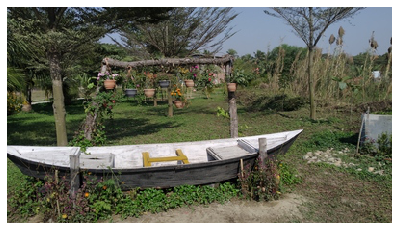

In [5]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image

I = I / 255.0
io.imshow(I)
plt.axis("off")

(-0.5, 399.5, 224.5, -0.5)

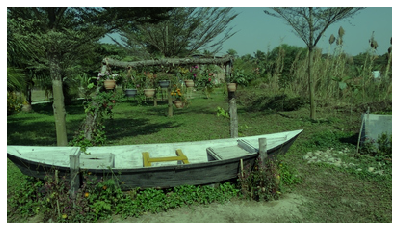

In [14]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift

# HINT: 
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = np.clip(I[:, :, 0] * np.random.uniform(0.3, 3), 0, 1)
I_tint[:, :, 1] = np.clip(I[:, :, 1] * np.random.uniform(0.3, 3), 0, 1)
I_tint[:, :, 2] = np.clip(I[:, :, 2] * np.random.uniform(0.3, 3), 0, 1)
io.imshow(I_tint)
plt.axis("off")

(-0.5, 399.5, 224.5, -0.5)

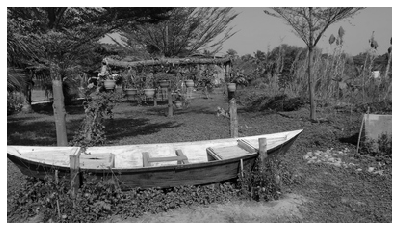

In [15]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it

I_gray = color.rgb2gray(I)
io.imshow(I_gray)
plt.axis("off")

(-0.5, 399.5, 224.5, -0.5)

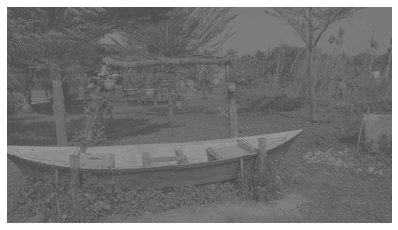

In [29]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))
io.imshow(I_degraded)
plt.axis("off")

In [22]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    I_stretched = np.zeros(I.shape) # replace with appropriate code
    I_stretched = np.clip(((I - r1) * ((s2 - s1) / (r2 - r1)) + s1), 0, 1)
    return I_stretched

(-0.5, 399.5, 224.5, -0.5)

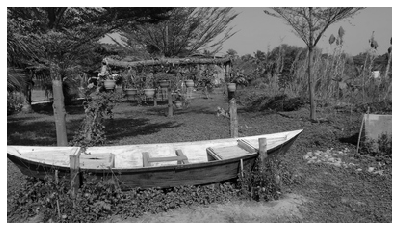

In [28]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.6
s1 = 0
s2 = 1
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)
io.imshow(I_stretched)
plt.axis("off")
# Display the stretched image

# Task 2 - Histogram and Equalization

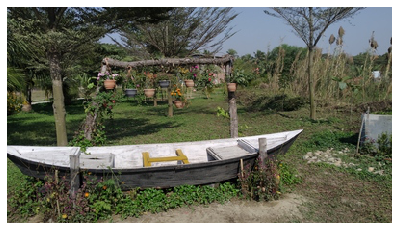

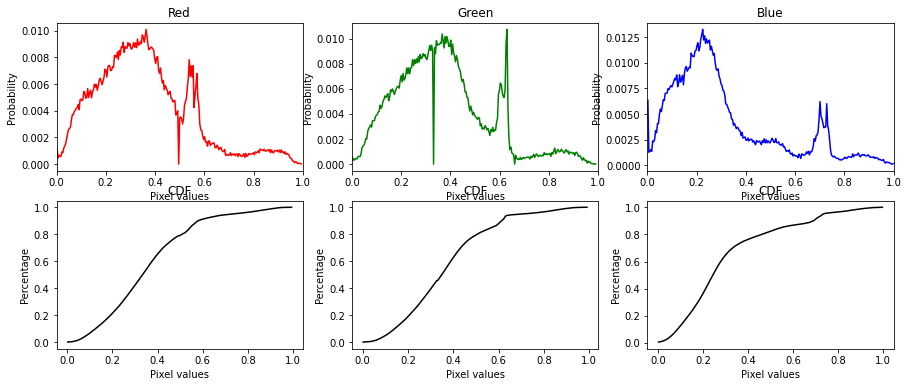

In [25]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

def plot_hist(I, ax, r, c, title = ""):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=256, normalize=True)
    colour = 'k'
    if(title == "Red"):
      colour = 'r'
    elif(title == "Green"):
      colour = 'g'
    else:
      colour = 'b'
    ax[r, c].plot(bins_hist, hist, colour)
    ax[r, c].set_xlabel("Pixel values")
    ax[r, c].set_ylabel("Probability")
    ax[r, c].set_title(title)
    ax[r, c].set_xlim([0, 1])

    
    cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
    ax[r+1, c].plot(bins_cdf, cdf, 'k')
    ax[r+1, c].set_xlabel("Pixel values")
    ax[r+1, c].set_ylabel("Percentage")
    ax[r+1, c].set_title("CDF")
    return bins_hist, hist, cdf

io.imshow(I)
plt.axis("off")

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))
bins_r, hist_r, cdf_r = plot_hist(I[:, :, 0], ax, 0, 0, title="Red")
bins_g, hist_g, cdf_g = plot_hist(I[:, :, 1], ax, 0, 1, title="Green")
bins_b, hist_b, cdf_b = plot_hist(I[:, :, 2], ax, 0, 2, title="Blue")

Text(0, 0.5, 'Percentage')

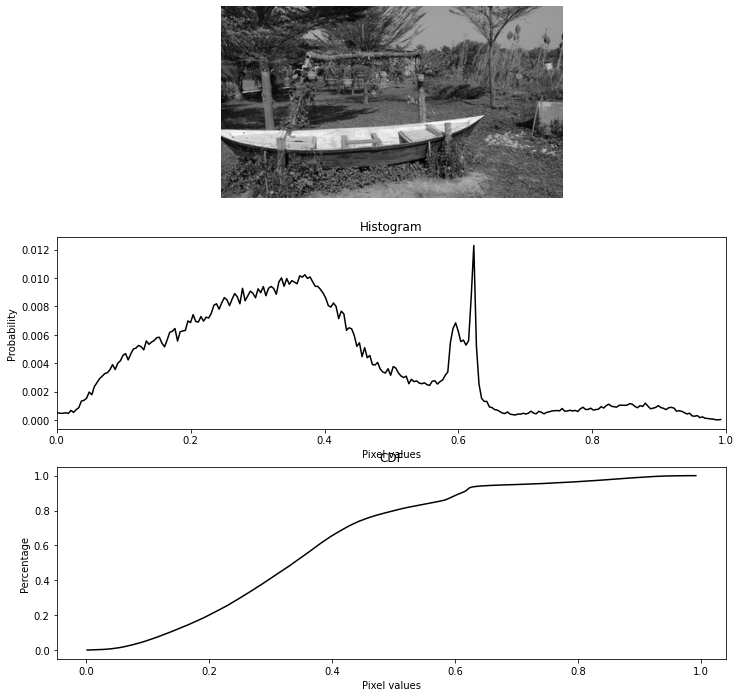

In [79]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 12))
ax[0].imshow(I_gray, cmap="gray")
ax[0].axis('off')
hist, bins_hist = exposure.histogram(I_gray.ravel(), nbins=256, normalize=True)
ax[1].plot(bins_hist, hist, 'k')
ax[1].set_xlabel("Pixel values")
ax[1].set_ylabel("Probability")
ax[1].set_title("Histogram")
ax[1].set_xlim([0, 1])

cdf, bins_cdf = exposure.cumulative_distribution(I_gray.ravel(), nbins=256)
ax[2].plot(bins_cdf, cdf, 'k')
ax[2].set_title("CDF")
ax[2].set_xlabel("Pixel values")
ax[2].set_ylabel("Percentage")

Text(0, 0.5, 'Percentage')

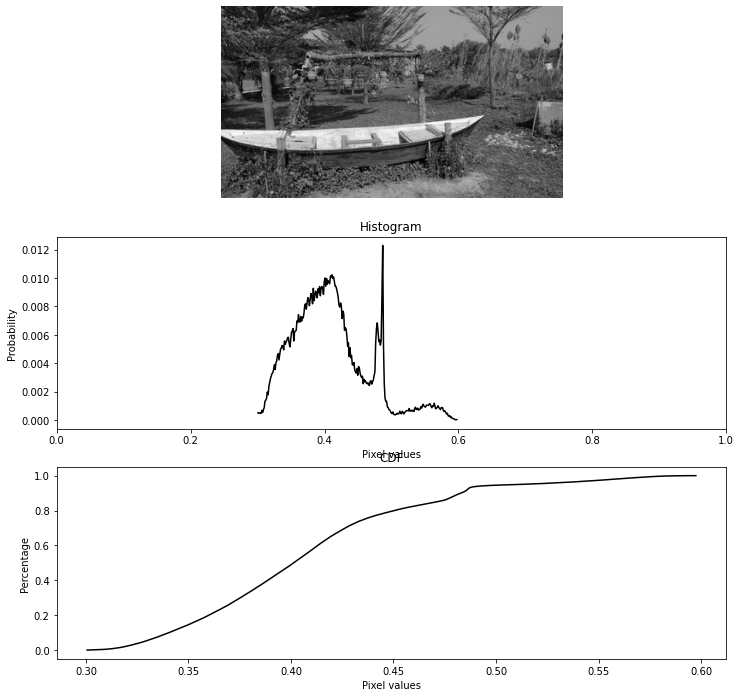

In [30]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 12))
ax[0].imshow(I_degraded, cmap="gray")
ax[0].axis('off')
hist, bins_hist = exposure.histogram(I_degraded.ravel(), nbins=256, normalize=True)
ax[1].plot(bins_hist, hist, 'k')
ax[1].set_xlabel("Pixel values")
ax[1].set_ylabel("Probability")
ax[1].set_title("Histogram")
ax[1].set_xlim([0, 1])

cdf, bins_cdf = exposure.cumulative_distribution(I_degraded.ravel(), nbins=256)
ax[2].plot(bins_cdf, cdf, 'k')
ax[2].set_title("CDF")
ax[2].set_xlabel("Pixel values")
ax[2].set_ylabel("Percentage")

(0.0, 1.0)

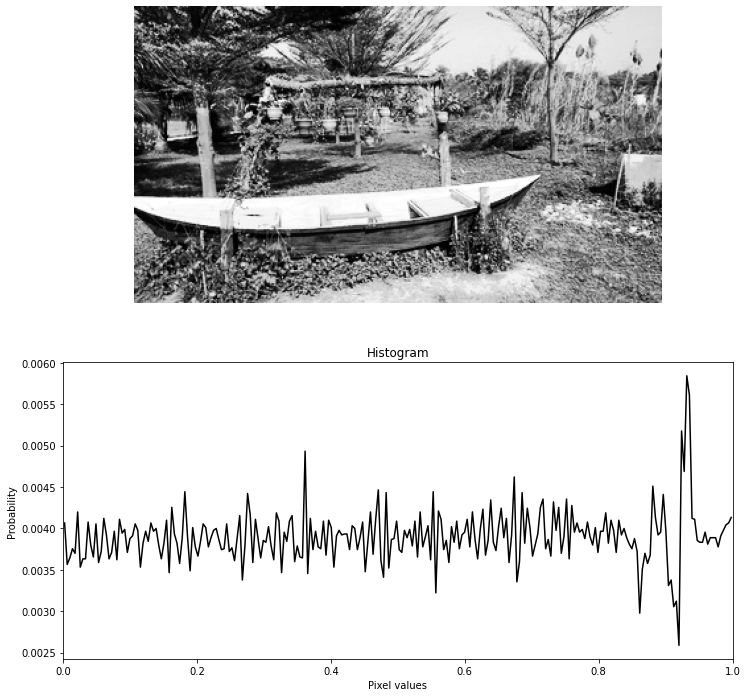

In [33]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 12))
ax[0].imshow(I_recon_gray, cmap="gray")
ax[0].axis('off')
hist, bins_hist = exposure.histogram(I_recon_gray.ravel(), nbins=256, normalize=True)
ax[1].plot(bins_hist, hist, 'k')
ax[1].set_xlabel("Pixel values")
ax[1].set_ylabel("Probability")
ax[1].set_title("Histogram")
ax[1].set_xlim([0, 1])

(0.0, 1.0)

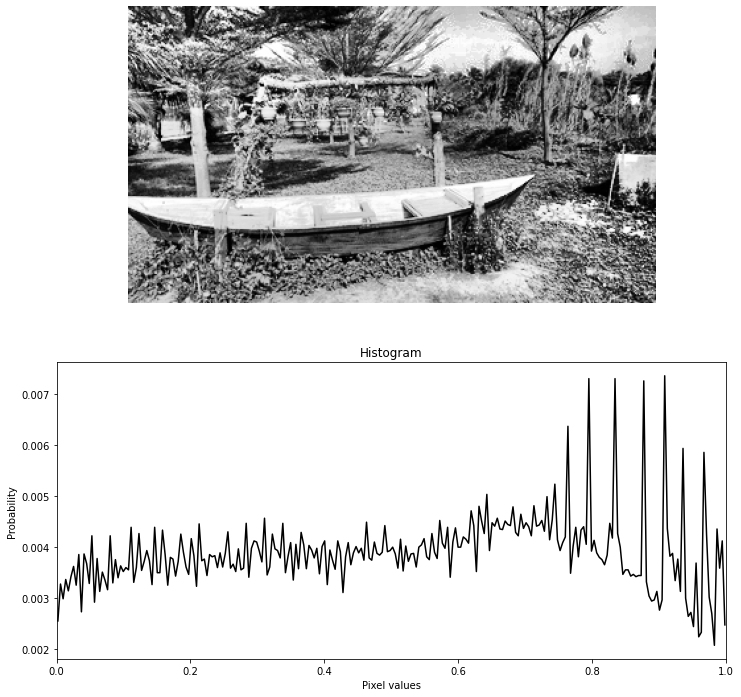

In [67]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(100, 100), clip_limit=0)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 12))
ax[0].imshow(I_recon_gray_2, cmap="gray")
ax[0].axis('off')
hist, bins_hist = exposure.histogram(I_recon_gray_2.ravel(), nbins=256, normalize=True)
ax[1].plot(bins_hist, hist, 'k')
ax[1].set_xlabel("Pixel values")
ax[1].set_ylabel("Probability")
ax[1].set_title("Histogram")
ax[1].set_xlim([0, 1])

(0.0, 1.0)

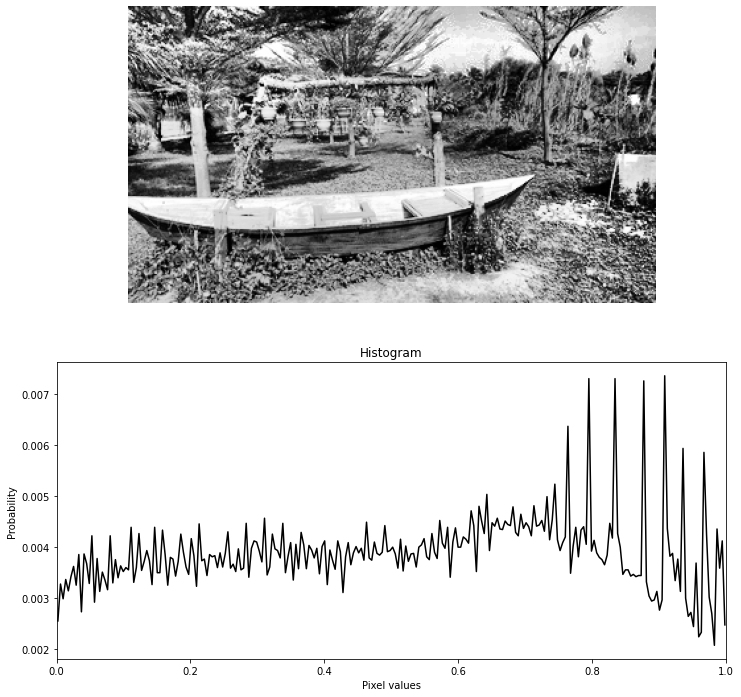

In [68]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(100, 100), clip_limit=0.1)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 12))
ax[0].imshow(I_recon_gray_3, cmap="gray")
ax[0].axis('off')
hist, bins_hist = exposure.histogram(I_recon_gray_3.ravel(), nbins=256, normalize=True)
ax[1].plot(bins_hist, hist, 'k')
ax[1].set_xlabel("Pixel values")
ax[1].set_ylabel("Probability")
ax[1].set_title("Histogram")
ax[1].set_xlim([0, 1])

In [ ]:
course_title = "CSE428"
print(f"Congrats! You have completed 67% of the Assignment 1 of {course_title} course.")

Congrats! You have completed 67% of the Assignment 1 of CSE428 course.


# Task 3 - Open Ended

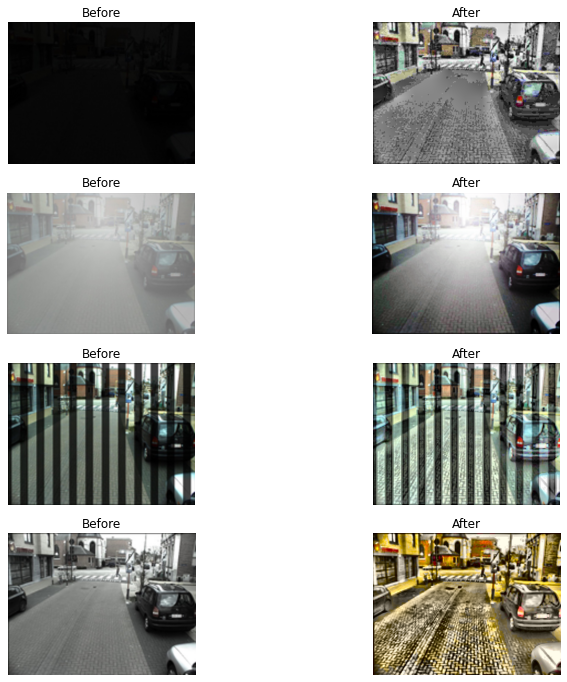

In [11]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

I = {0:None, 1:None, 2:None, 3:None}

I[0] = io.imread("/content/challenge-1.jpeg")
I[0] = I[0] / 255.0

I[1] = io.imread("/content/challenge-2.jpeg")
I[1] = I[1] / 255.0

I[2] = io.imread("/content/challenge-3.jpeg")
I[2] = I[2] / 255.0

I[3] = io.imread("/content/challenge-4.jpeg")
I[3] = I[3] / 255.0

R = {0:np.zeros(I[0].shape), 1:np.zeros(I[1].shape), 2:np.zeros(I[2].shape), 3:np.zeros(I[3].shape)}

# Image 1
R[0] = exposure.equalize_adapthist(I[0], kernel_size=(100, 100), clip_limit=0.1)

# Image 2
R[1][:, :, 0] = exposure.equalize_hist(I[1][:, :, 0])
R[1][:, :, 1] = exposure.equalize_hist(I[1][:, :, 1])
R[1][:, :, 2] = exposure.equalize_hist(I[1][:, :, 2])

# Image 3
R[2] = exposure.equalize_adapthist(I[2], kernel_size=(100, 100), clip_limit=0.1)

# Image 4
R[3] = color.rgb2lab(I[3])

R[3][:, :, 0] = R[3][:, :, 0] / 100
R[3][:, :, 1] = R[3][:, :, 1] / 100
R[3][:, :, 2] = R[3][:, :, 2] / 100

R[3][:, :, 0] = exposure.equalize_adapthist(R[3][:, :, 0], kernel_size=(100, 100), clip_limit=0.1) * 100
R[3][:, :, 1] = exposure.equalize_adapthist(R[3][:, :, 1], kernel_size=(100, 100), clip_limit=0.1) * 100
R[3][:, :, 2] = exposure.equalize_adapthist(R[3][:, :, 2], kernel_size=(100, 100), clip_limit=0.1) * 100

R[3] = color.lab2rgb(R[3])

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 12))
for i in range(4):
  ax[i, 0].imshow(I[i])
  ax[i, 1].imshow(R[i])
  ax[i, 0].axis('off')
  ax[i, 1].axis('off')
  ax[i, 0].set_title("Before")
  ax[i, 1].set_title("After")